<a href="https://colab.research.google.com/github/JDS1975/M-todos-supervisados/blob/main/FMG_1archivo_PE74.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd
import io
import matplotlib
import matplotlib.pyplot as plt
from decimal import Decimal
import os
import itertools

In [ ]:
%%html

# Preparación de datos

# Nueva sección

# Nueva sección

In [ ]:
#@title Evitar warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#@title Carga de ficheros
from google.colab import files
uploaded = files.upload()

In [ ]:
#@title Lista de archivos
import os
file_list = []
for file in os.listdir():
    if file.endswith('.dat'):
        file_list.append(file)

In [ ]:
#@title Captura de correlativo, formato y fecha
rail_type_lines = []
correlativo = []
fecha = []
for filename in file_list:
    with open(filename) as f:
        for line in f:
            if line.startswith('RailType'):
              rail_type_lines.append(line)
            if line.startswith('SerialNr'):
              correlativo.append(line)
            if line.startswith('Date'):
              fecha.append(line)

In [ ]:
#@title Obtención de los dataset con flecha horizontal
import os
import pandas as pd

os.chdir('/content')
files = os.listdir()

dfs = []
for file in files:
    if file.endswith('.dat'):
        with open(file, 'r') as f:
            lines = f.readlines()
            lines = [line for line in lines if line.endswith('H\n')]
        df = pd.DataFrame(lines)
        dfs.append(df)

# Accede a los dataframes por separado
for i in range(len(dfs)):
    dfs[i] = dfs[i][0].str.split(expand=True)
    dfs[i].columns = ['Medicion', 'col2', 'Galga', 'm1', 'max_point', 'm2', 'resul', 'col8', 'col9']
    dfs[i].drop(['col2','col8','col9'],axis=1,inplace=True)
    dfs[i]['fecha'] = fecha[i]
    dfs[i]['fecha'] = dfs[i]['fecha'].str[7:17]
    dfs[i]['corre'] = correlativo[i]
    dfs[i]['corre'] = dfs[i]['corre'].str[16:21]
    dfs[i]['Galga'] = dfs[i]['Galga'].str.replace(',', '.').astype(float)
    dfs[i]['año']=pd.DatetimeIndex(dfs[i]['fecha']).year
    dfs[i]['mes']=pd.DatetimeIndex(dfs[i]['fecha']).month
    dfs[i]['dia']=pd.DatetimeIndex(dfs[i]['fecha']).day
    dfs[i].drop('fecha',axis=1,inplace = True)
    

In [ ]:
#@title Listado de correlativos
corre_list = []

for df in dfs:
    if isinstance(df, pd.DataFrame):
        corre_list.append(df['corre'].iloc[0])



# Resultados rectitud horizontal

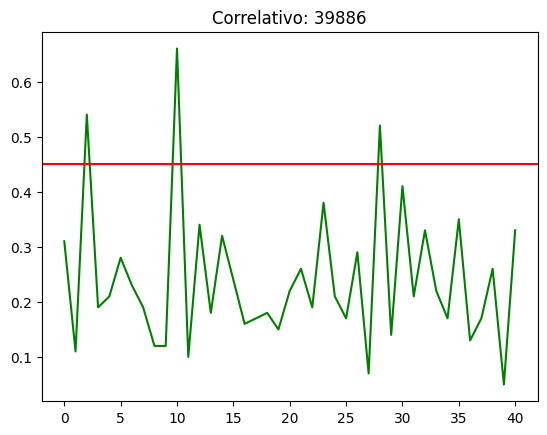

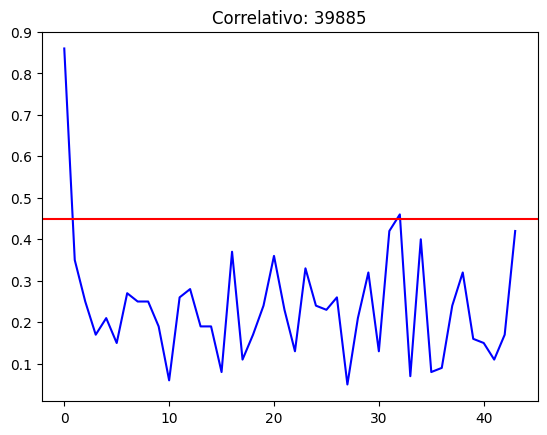

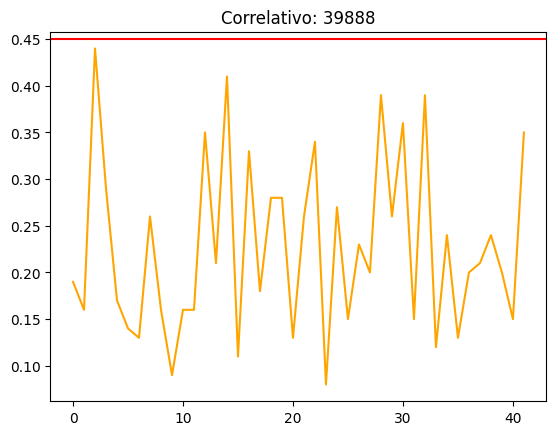

In [ ]:
#@title Graficos de la flecha horizontal en los distintos correlativos
import itertools
import matplotlib.pyplot as plt

colors = itertools.cycle(['green', 'blue', 'orange', 'purple', 'pink'])

for i, df in enumerate(dfs):
    if isinstance(df, pd.DataFrame):
        fig, ax = plt.subplots()
        for col in df.columns:
            if col == 'Galga':
                plt.plot(df[col], color=next(colors), label=corre_list[i])
        plt.axhline(y=0.45, color='r', linestyle='-')
        ax.set_title('Correlativo: '+corre_list[i])

# Resultados rectitud vertical

In [ ]:
#@title Obtención de los dataset con flecha vertical
os.chdir('/content')
files = os.listdir()

dfs = []
for file in files:
    if file.endswith('.dat'):
        with open(file, 'r') as f:
            lines = f.readlines()
            lines = [line for line in lines if line.endswith('V\n')]
        df = pd.DataFrame(lines)
        dfs.append(df)

# Accede a los dataframes por separado
for i in range(len(dfs)):
    dfs[i] = dfs[i][0].str.split(expand=True)
    dfs[i].columns = ['Medicion', 'col2', 'Galga', 'm1', 'max_point', 'm2', 'resul', 'col8', 'col9']
    dfs[i].drop(['col2','col8','col9'],axis=1,inplace=True)
    dfs[i]['fecha'] = fecha[i]
    dfs[i]['fecha'] = dfs[i]['fecha'].str[7:17]
    dfs[i]['corre'] = correlativo[i]
    dfs[i]['corre'] = dfs[i]['corre'].str[16:21]
    dfs[i]['Galga'] = dfs[i]['Galga'].str.replace(',', '.').astype(float)
    dfs[i]['año']=pd.DatetimeIndex(dfs[i]['fecha']).year
    dfs[i]['mes']=pd.DatetimeIndex(dfs[i]['fecha']).month
    dfs[i]['dia']=pd.DatetimeIndex(dfs[i]['fecha']).day
    dfs[i].drop('fecha',axis=1,inplace = True)
    

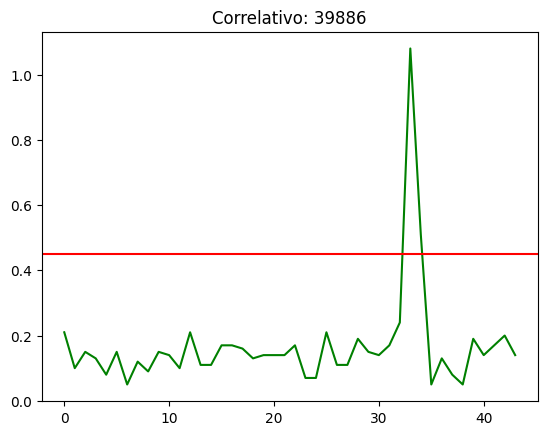

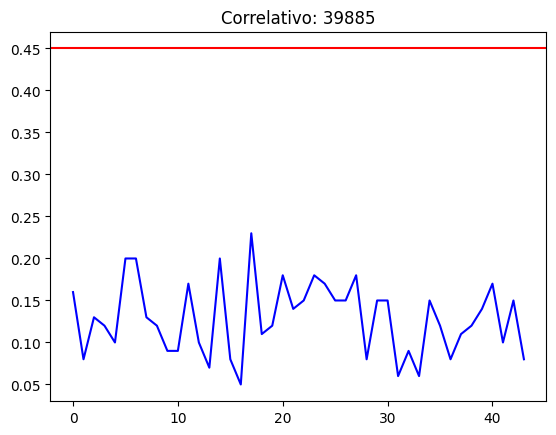

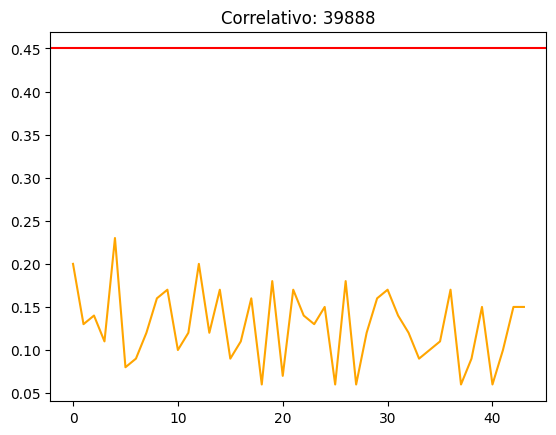

In [ ]:
#@title Graficos de la flecha vertical en los distintos correlativos
colors = itertools.cycle(['green', 'blue', 'orange', 'purple', 'pink'])

for i, df in enumerate(dfs):
    if isinstance(df, pd.DataFrame):
        fig, ax = plt.subplots()
        for col in df.columns:
            if col == 'Galga':
                plt.plot(df[col], color=next(colors), label=corre_list[i])
        plt.axhline(y=0.45, color='r', linestyle='-')
        ax.set_title('Correlativo: '+corre_list[i])

In [ ]:
# pte cambiar listas de dataframes para tener dos, la de la flecha horizontal y la vertical 
#@title Descarga a xlsx
#with pd.ExcelWriter('output.xlsx') as writer:
#    for i in range(len(dfs)):
#        dfs[i].to_excel(writer, sheet_name=f'dataframe_{i}')